# Learn about the training dataset

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler


/anaconda2/envs/awtpy3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda2/envs/awtpy3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda2/envs/awtpy3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda2/envs/awtpy3/lib/python3.7/site-packages/tensorflow/python/framework/dty

In [3]:
def plot_samples(dataframe, num_of_samples):
    samples = dataframe.iloc[:num_of_samples]
    x = np.arange(0,samples.shape[1])
    plt.figure(figsize=(20,10))
    plt.plot(x, samples.T.values)


In [4]:
hourly_df = pd.read_csv('Train/Hourly-train.csv', header=0, index_col=0)
hourly_df.head()


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V952,V953,V954,V955,V956,V957,V958,V959,V960,V961
V1,,,,,,,,,,,,,,,,,,,,,
H1,605.0,586.0,586.0,559.0,511.0,443.0,422.0,395.0,382.0,370.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H2,3124.0,2990.0,2862.0,2809.0,2544.0,2201.0,1996.0,1861.0,1735.0,1713.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H3,1828.0,1806.0,1897.0,1750.0,1679.0,1620.0,1463.0,1342.0,1192.0,1108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H4,6454.0,6324.0,6075.0,5949.0,5858.0,5579.0,5163.0,4790.0,4478.0,4227.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H5,4263.0,4297.0,4236.0,4080.0,3883.0,3672.0,3248.0,2841.0,2513.0,2275.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(414, 960)


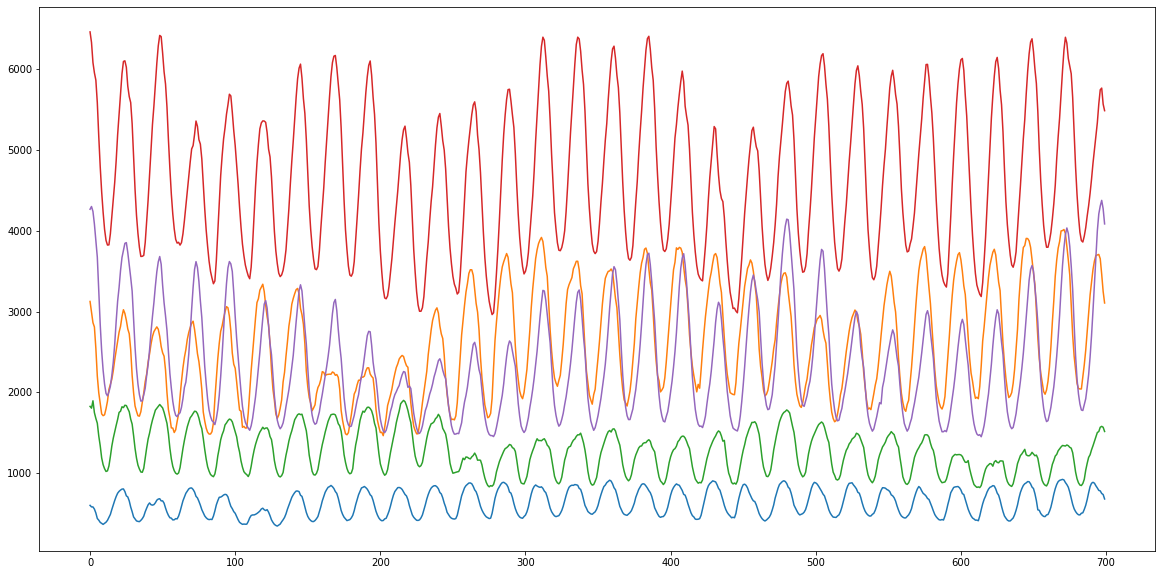

In [5]:
print(hourly_df.shape)
plot_samples(hourly_df, 5)

# learn more about the test dataset

In [6]:
hourly_df_test = pd.read_csv('Test/Hourly-test.csv', header=0, index_col=0)
hourly_df_test.head()


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49
V1,,,,,,,,,,,,,,,,,,,,,
H1,619.0,565.0,532.0,495.0,481.0,467.0,473.0,488.0,501.0,534.0,...,812.0,836.0,838.0,829.0,807.0,785.0,756.0,719.0,703.0,659.0
H2,2771.0,2396.0,2189.0,1984.0,1872.0,1843.0,1828.0,1872.0,1952.0,2069.0,...,3018.0,3206.0,3356.0,3499.0,3550.0,3558.0,3488.0,3224.0,3054.0,2918.0
H3,1455.0,1376.0,1235.0,1101.0,1003.0,943.0,905.0,886.0,910.0,970.0,...,1457.0,1529.0,1627.0,1701.0,1754.0,1791.0,1819.0,1791.0,1758.0,1679.0
H4,5327.0,5051.0,4683.0,4319.0,4049.0,3847.0,3712.0,3639.0,3652.0,3758.0,...,5337.0,5675.0,5926.0,6159.0,6313.0,6072.0,5612.0,5220.0,4895.0,4793.0
H5,3823.0,3501.0,3039.0,2613.0,2312.0,2079.0,1938.0,1839.0,1821.0,1877.0,...,2345.0,2529.0,2737.0,3028.0,3292.0,3453.0,3574.0,3522.0,3338.0,3041.0


(414, 48)


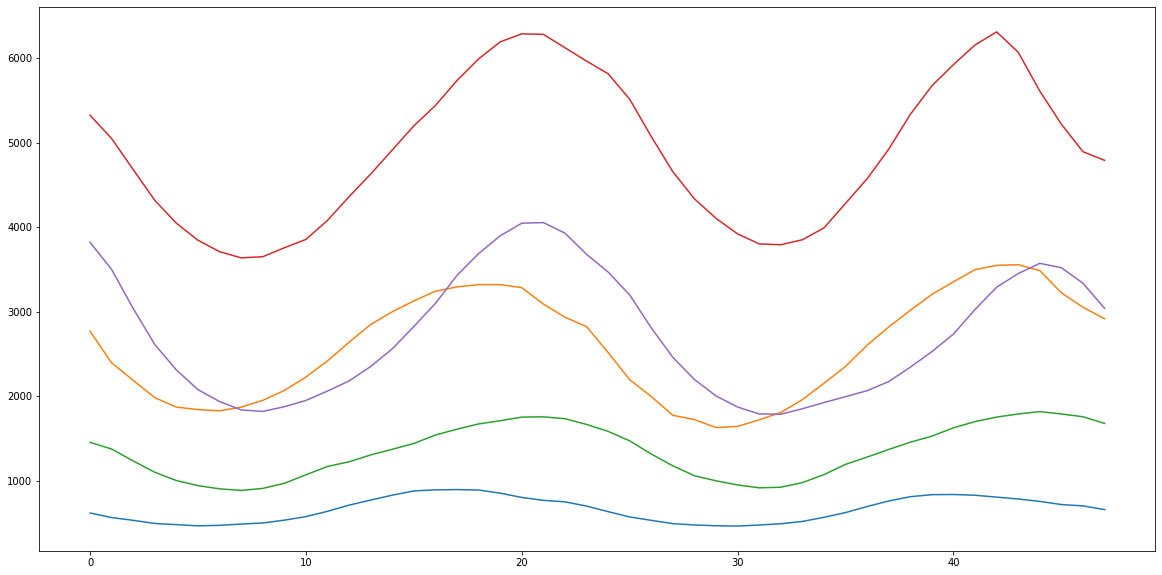

In [7]:
print(hourly_df_test.shape)
plot_samples(hourly_df_test, 5)


# Preprocessing
https://www.tensorflow.org/tutorials/structured_data/time_series

In [18]:
dataset = hourly_df.values


In [9]:
TESTSET_HORIZION = hourly_df_test.shape[1]
TESTSET_HORIZION

48

In [10]:
samples_num, TRAINSET_LOOKUP = dataset.shape
TRAIN_SPLIT = int(0.75 * samples_num)
samples_num, TRAIN_SPLIT

(414, 310)

# Standardize timesteps by removing the mean and scaling to unit variance

In [16]:
def standardize(train_dataset):
    scaler = StandardScaler()
    scaler.fit(train_dataset)
    standardized_train_dataset = scaler.transform(train_dataset)
    
    return standardized_train_dataset


std_dataset = standardize(dataset)


ValueError: Found array with 0 feature(s) (shape=(414, 0)) while a minimum of 1 is required by StandardScaler.

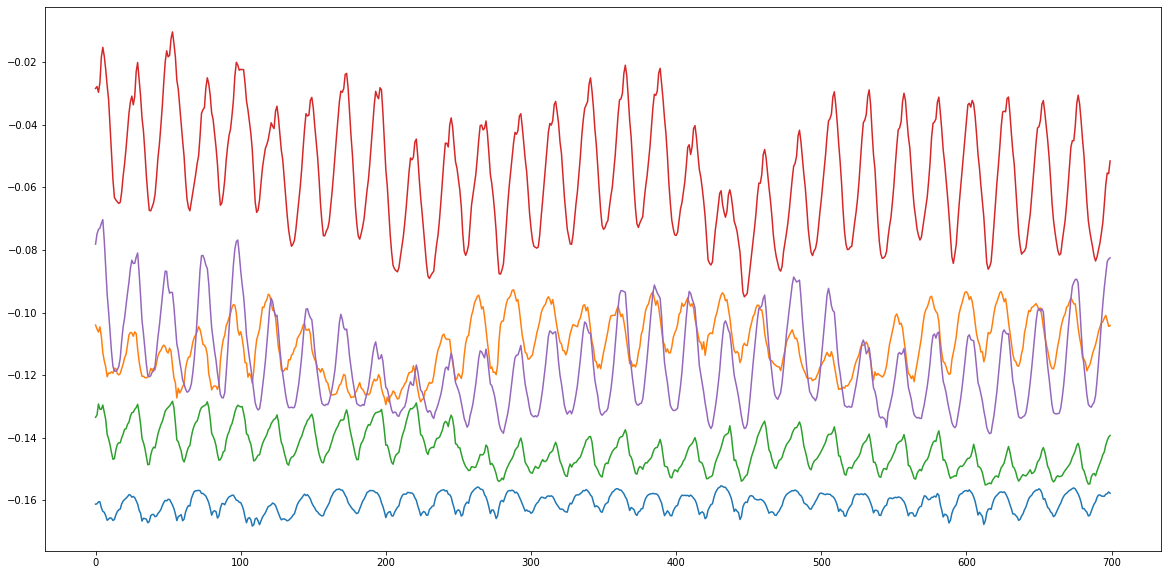

In [17]:

# Draw Five samples

samples = std_dataset
x = np.arange(0,samples.shape[1])
plt.figure(figsize=(20,10))
plt.plot(x, samples[0])
plt.plot(x, samples[1])
plt.plot(x, samples[2])
plt.plot(x, samples[3])
plt.plot(x, samples[4])



# Crop dataset to get rid of Nan values

In [13]:
def shuffle_along_axis(a, axis):
    idx = np.random.rand(*a.shape).argsort(axis=axis)
    return np.take_along_axis(a,idx,axis=axis)


In [23]:
from numpy import *
dataset = hourly_df.values

# get the indecis of the nan values
where_are_NaNs = np.isnan(dataset)
argmax_index = np.argmax(where_are_NaNs)
print(argmax_index)


# replace the left nan values with zeros
dataset[where_are_NaNs] = 0


700


In [24]:

# crop dataset
dataset = dataset[:,:argmax_index]


In [25]:

# standardize the samples
std_dataset_no_nan = standardize(dataset)


In [26]:

# shuffel rows
shuffle_along_axis(std_dataset_no_nan, axis=0)

print(std_dataset_no_nan.shape)


(414, 700)


In [27]:
TRAINSET_LOOK_BACK = std_dataset_no_nan.shape[1] - TESTSET_HORIZION
TRAINSET_LOOK_BACK

652

# Split dataset

In [29]:
train_dataset = std_dataset_no_nan[0:TRAIN_SPLIT, :]
val_dataset = std_dataset_no_nan[TRAIN_SPLIT:, :]

print(std_dataset_no_nan.shape)
print(train_dataset.shape)
print(val_dataset.shape)


(414, 700)
(310, 700)
(104, 700)


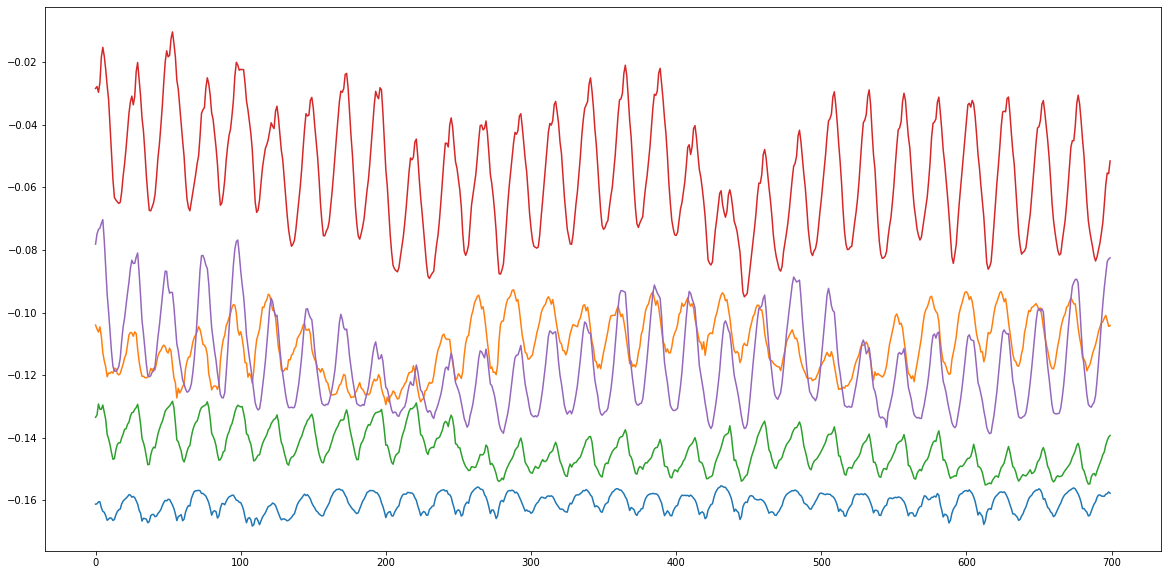

In [30]:

# Draw Five samples
samples = std_dataset_no_nan
x = np.arange(0,samples.shape[1])
plt.figure(figsize=(20,10))
plt.plot(x, samples[0])
plt.plot(x, samples[1])
plt.plot(x, samples[2])
plt.plot(x, samples[3])
plt.plot(x, samples[4])


# Split to X and Y

In [32]:

def univariate_data(dataset, start_index, end_index):
    data = []
    labels = []

    data   = dataset[:, start_index:end_index]
    labels = dataset[:, end_index:]
    
    return np.array(data), np.array(labels)

    
x_train_uni, y_train_uni = univariate_data(train_dataset, 0, TRAINSET_LOOK_BACK)
x_val_uni, y_val_uni     = univariate_data(val_dataset, 0, TRAINSET_LOOK_BACK)

print('Train')
print(x_train_uni.shape)
print(y_train_uni.shape)

print('Val')         
print(x_val_uni.shape)
print(y_val_uni.shape)  

# print ('Single window of past history')
# print (x_train_uni[0])
# print ('\n Target audience size to predict')
# print (y_train_uni[0])


Train
(310, 652)
(310, 48)
Val
(104, 652)
(104, 48)


In [33]:
BATCH_SIZE = 25
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()


In [34]:
def create_time_steps(length, start):
    time_steps = []
    for i in range(start, length + start):
        time_steps.append(i)
        
    return time_steps

def show_plot(history, future, model_prediction,title):
    time_steps_history = create_time_steps(history.shape[0] ,start=0)
    time_steps_future  = create_time_steps(future.shape[0] , start=history.shape[0])
    time_steps_pred    = create_time_steps(model_prediction.shape[0] , start=history.shape[0])

    plt.figure(figsize=(20,10))
    plt.title(title)
    
    plt.plot(time_steps_history, history, '-', markersize=10, color = 'blue', label='History')
    plt.plot(time_steps_future , future , '-', markersize=10, color = 'red' , label='True Future')
    plt.plot(time_steps_pred, model_prediction, '-', markersize=10, color = 'green', label='Model Prediction')

    plt.legend()
    plt.xlabel('Time-Step')
    plt.ylabel('Audience Size')
    
    return plt

<module 'matplotlib.pyplot' from '/anaconda2/envs/awtpy3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

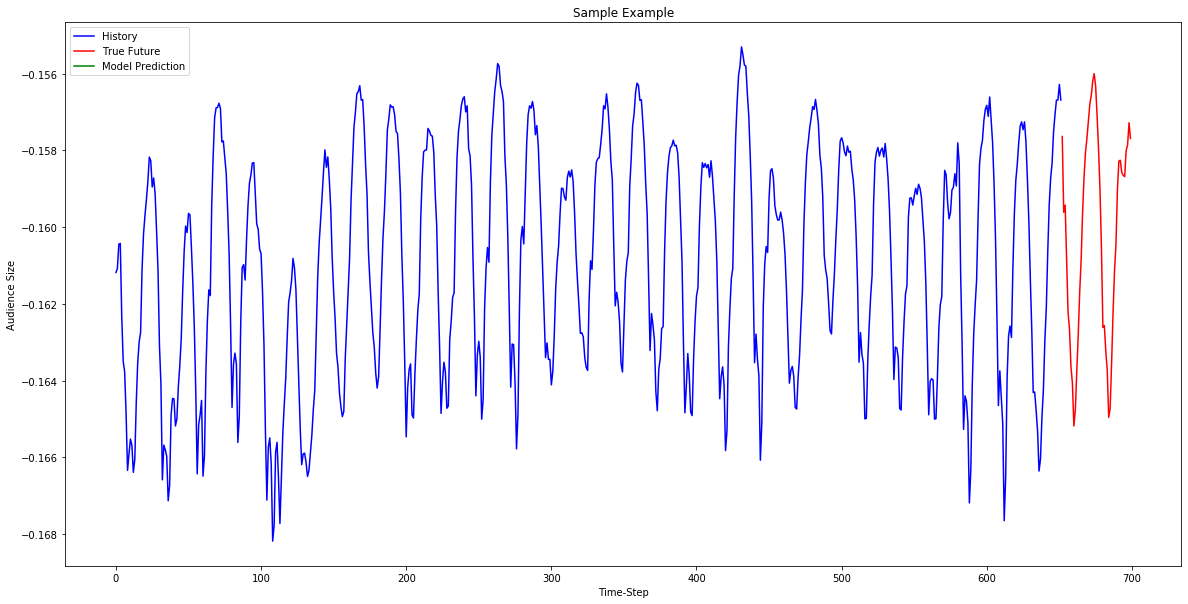

In [35]:

show_plot(x_train_uni[0], y_train_uni[0], np.array([]), 'Sample Example')


In [54]:
print(x_train_uni.shape)
print(y_train_uni.shape)


multi_step_model = tf.keras.models.Sequential()

multi_step_model.add(tf.keras.layers.LSTM(80, input_shape=(TRAINSET_LOOK_BACK, 1), activation='tanh', return_sequences=True))

multi_step_model.add(tf.keras.layers.LSTM(80, input_shape=(TRAINSET_LOOK_BACK, 1), activation='tanh'))
                     
multi_step_model.add(tf.keras.layers.Dense(TESTSET_HORIZION))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-3, clipvalue=1.0),
                         loss='mae', 
                         metrics=['accuracy'])

multi_step_model.summary()

(310, 652)
(310, 48)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 652, 80)           26240     
_________________________________________________________________
lstm_7 (LSTM)                (None, 80)                51520     
_________________________________________________________________
dense_3 (Dense)              (None, 48)                3888      
Total params: 81,648
Trainable params: 81,648
Non-trainable params: 0
_________________________________________________________________


In [60]:
from tensorflow import keras

EPOCHS = 25
EVALUATION_INTERVAL=int(np.floor(samples_num / float(BATCH_SIZE)))
print(EVALUATION_INTERVAL)

print(samples_num) #(310, 1, 480)

rx_train_uni = x_train_uni.reshape(x_train_uni.shape[0], x_train_uni.shape[1] , 1)
rx_val_uni = x_val_uni.reshape(x_val_uni.shape[0], x_val_uni.shape[1] , 1)


16
414


In [70]:


# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

multi_step_history = multi_step_model.fit(rx_train_uni, y_train_uni,
                                          epochs=EPOCHS,
                                          batch_size=BATCH_SIZE, 
                                          callbacks=[early_stop],
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=(rx_val_uni, y_val_uni)
                                         )


Epoch 1/25
16/16 [==============================] - 58s 4s/step - loss: 0.1004 - acc: 0.0389 - val_loss: 0.0040 - val_acc: 0.0000e+00
Epoch 2/25
16/16 [==============================] - 57s 4s/step - loss: 0.0955 - acc: 0.0423 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 3/25
16/16 [==============================] - 54s 3s/step - loss: 0.0938 - acc: 0.0165 - val_loss: 0.0312 - val_acc: 0.0096
Epoch 4/25
16/16 [==============================] - 53s 3s/step - loss: 0.0922 - acc: 0.0161 - val_loss: 0.0311 - val_acc: 0.0000e+00
Epoch 5/25
16/16 [==============================] - 45s 3s/step - loss: 0.0915 - acc: 0.0258 - val_loss: 0.0064 - val_acc: 0.0000e+00
Epoch 6/25
16/16 [==============================] - 45s 3s/step - loss: 0.0888 - acc: 0.0256 - val_loss: 0.0345 - val_acc: 0.0000e+00
Epoch 7/25
16/16 [==============================] - 45s 3s/step - loss: 0.0860 - acc: 0.0177 - val_loss: 0.0056 - val_acc: 0.0000e+00
Epoch 00007: early stopping


In [72]:
model_file_path = 'trained_models/model-48-25epoch.json'
model_weight_file_path = 'trained_models/model-48-weights-25epoch.h5'

multi_step_model.save(model_file_path)
multi_step_model.save_weights(model_weight_file_path)


# Diagnostic Plots

In [73]:
model=keras.models.load_model(model_file_path)
model.load_weights(model_weight_file_path)
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 652, 80)           26240     
_________________________________________________________________
lstm_7 (LSTM)                (None, 80)                51520     
_________________________________________________________________
dense_3 (Dense)              (None, 48)                3888      
Total params: 81,648
Trainable params: 81,648
Non-trainable params: 0
_________________________________________________________________


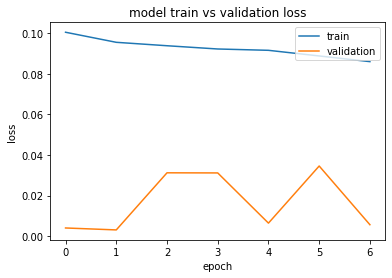

In [75]:

plt.plot(multi_step_history.history['loss'])
plt.plot(multi_step_history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Prediction

In [97]:
test_data = hourly_df_test.values

shx_train_uni, shy_train_uni = univariate_data(train_dataset, TESTSET_HORIZION, train_dataset.shape[1])

print(shx_train_uni.shape) #(310, 652)
print(train_dataset.shape[1]) #700

train_data_reshaped = shx_train_uni.reshape(shx_train_uni.shape[0], shx_train_uni.shape[1],1)

batch_number=int(np.floor(len(train_data_reshaped) / float(BATCH_SIZE)))
predicted = []
current_index = BATCH_SIZE
start_index = 0

for batch in range(0, batch_number):
    predicted.extend(multi_step_model.predict(train_data_reshaped[start_index:current_index,:]))
    start_index = current_index
    current_index+= BATCH_SIZE
    
predicted[0]

(310, 652)
700


array([-0.16514638, -0.1622385 , -0.16943033, -0.1672205 , -0.17047499,
       -0.16338585, -0.16389912, -0.17022185, -0.17230028, -0.17245889,
       -0.16995777, -0.16795933, -0.17018318, -0.16518967, -0.17343616,
       -0.17190045, -0.1697765 , -0.17356561, -0.16298996, -0.17072426,
       -0.17164122, -0.17148973, -0.16386326, -0.17080787, -0.16119495,
       -0.16261093, -0.16984671, -0.16870826, -0.17098929, -0.17138627,
       -0.17010385, -0.16776112, -0.17044626, -0.1732391 , -0.1699363 ,
       -0.16414699, -0.1715557 , -0.1701734 , -0.17109294, -0.17062603,
       -0.16798049, -0.17145003, -0.16831988, -0.1674724 , -0.16608751,
       -0.1670996 , -0.16993026, -0.1683321 ], dtype=float32)

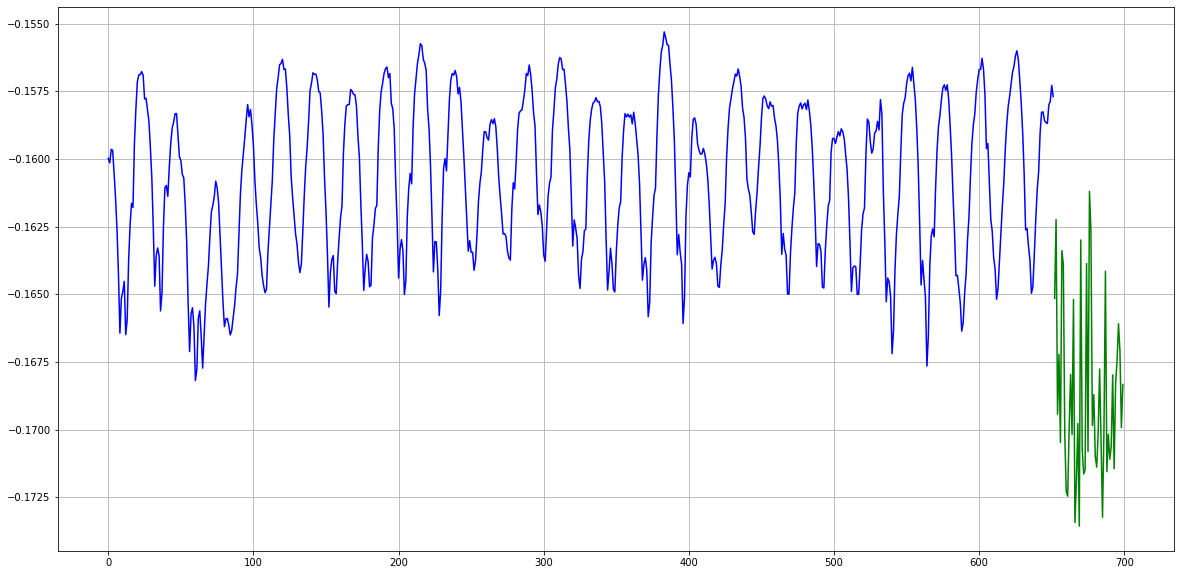

In [118]:
test_data = hourly_df_test.values
test_data_re = test_data.reshape(test_data.shape[0], test_data.shape[1],1)

plt.figure(figsize=(20,10))
plt.grid(True)

train_xy = np.concatenate( (shx_train_uni, shy_train_uni), axis = 1)

# plot the predition for one sample
for i in range(0, 1):
    
    time_steps_history = create_time_steps(700-48, start=0)
    time_steps_future  = create_time_steps(48 , start=700-48)
    time_steps_pred    = create_time_steps(48 , start=700-48)

    plt.plot(time_steps_history, train_xy[i], '-', markersize=10, color = 'blue', label='History')
    plt.plot(time_steps_pred, predicted[i], '-', markersize=10, color = 'green', label='Model Prediction')
    #plt.plot(time_steps_future , test_data[i] , '-', markersize=10, color = 'red' , label='True Future')



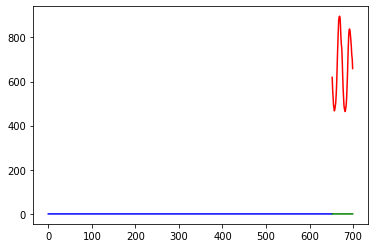

In [120]:
# plot the predition for one sample
for i in range(0, 1):
    
    time_steps_history = create_time_steps(700-48, start=0)
    time_steps_future  = create_time_steps(48 , start=700-48)
    time_steps_pred    = create_time_steps(48 , start=700-48)

    plt.plot(time_steps_history, train_xy[i], '-', markersize=10, color = 'blue', label='History')
    plt.plot(time_steps_pred, predicted[i], '-', markersize=10, color = 'green', label='Model Prediction')
    plt.plot(time_steps_future , test_data[i] , '-', markersize=10, color = 'red' , label='True Future')

